In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import tflearn
import tensorflow as tf
import seaborn
import warnings
warnings.filterwarnings('ignore')

from subprocess import check_output
print(check_output(["ls", "/Users/bruce/Desktop/datasets/houseprice"]).decode("utf8"))

test.csv
train.csv



In [17]:
train = pd.read_csv('/Users/bruce/Desktop/datasets/houseprice/train.csv')
labels=train["SalePrice"]
test = pd.read_csv('/Users/bruce/Desktop/datasets/houseprice/test.csv')
data = pd.concat([train,test],ignore_index=True)
data = data.drop("SalePrice", 1)
ids = test["Id"]

In [18]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
train.shape[0]

1460

In [20]:
data.shape[0]

2919

In [21]:
nans=pd.isnull(data).sum()
nans[nans>0]

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

In [22]:
data=data.drop("Id", 1)
data=data.drop("Alley", 1)
data=data.drop("Fence", 1)
data=data.drop("MiscFeature", 1)
data=data.drop("PoolQC", 1)
data=data.drop("FireplaceQu", 1)

In [23]:
data.dtypes.value_counts()

object     38
int64      25
float64    11
dtype: int64

In [24]:
all_columns = data.columns.values
non_categorical = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", 
                   "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", 
                   "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", 
                   "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
                   "ScreenPorch","PoolArea", "MiscVal"]

categorical = [value for value in all_columns if value not in non_categorical]

In [25]:
data = pd.get_dummies(data)
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
data = imp.fit_transform(data)

data = np.log(data)
labels = np.log(labels)

# Change -inf to 0 again
data[data==-np.inf]=0

In [26]:
pca = PCA(whiten=True)
pca.fit(data)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([ 0.2248857 ,  0.40281429,  0.52425789,  0.62418823,  0.69580422,
        0.75944463,  0.8116806 ,  0.85647038,  0.89178708,  0.92273755,
        0.94898868,  0.95842727,  0.96637545,  0.97380464,  0.97971901,
        0.98501952,  0.98918839,  0.99199181,  0.99386559,  0.99520919,
        0.99611479,  0.99695667,  0.99771023,  0.99842564,  0.9989402 ,
        0.99933882,  0.99959949,  0.99978254,  0.99988174,  0.99993998,
        0.99998599,  0.99999658,  0.99999871,  0.99999943,  0.99999999,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.  

In [27]:
pca = PCA(n_components=36,whiten=True)
pca = pca.fit(data)
dataPCA = pca.transform(data)

In [28]:
train = data[:1460]
test = data[1460:]

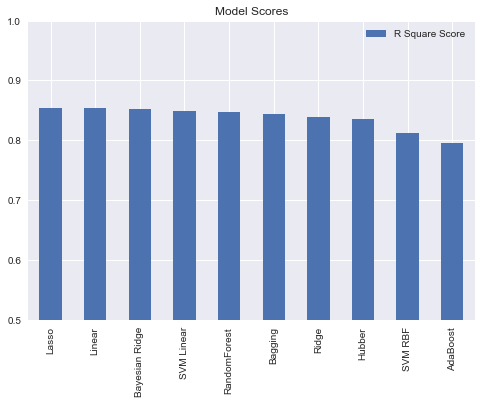

,R Square Score
Lasso,0.853933
Linear,0.853790
Bayesian Ridge,0.852442
SVM Linear,0.849076
RandomForest,0.847623
Bagging,0.843350
Ridge,0.838624
Hubber,0.835454
SVM RBF,0.812019
AdaBoost,0.794530


In [29]:
def lets_try(train,labels):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, train, labels, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AdaBoostRegressor()
    results["AdaBoost"]=test_model(clf)
    
    clf = svm.SVR()
    results["SVM RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVM Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    results=results.sort(columns=["R Square Score"],ascending=False)
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    plt.show()
    return results

lets_try(train,labels)

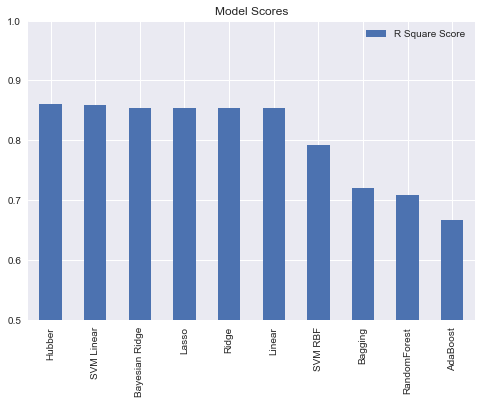

,R Square Score
Hubber,0.859653
SVM Linear,0.858350
Bayesian Ridge,0.853913
Lasso,0.853862
Ridge,0.853826
Linear,0.853790
SVM RBF,0.791327
Bagging,0.720339
RandomForest,0.708530
AdaBoost,0.666255


In [30]:
train = dataPCA[:1460]
test = dataPCA[1460:]

lets_try(train,labels)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train, labels, test_size=0.25, random_state=10)

In [32]:
len(X_train)

1095

# decision tree by Xgboost

In [17]:
from xgboost import XGBRegressor

final_model = XGBRegressor(n_estimators=1,num_boost_round=1,max_depth=5,subsample=1,colsample_bytree=1)
final_model.fit(X_train, Y_train)
y_pred = final_model.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

print(mean_squared_error(Y_test, y_pred))
print(explained_variance_score(Y_test, y_pred))





107.434637301
0.0


# Bagged trees by Xgboost

In [19]:
from xgboost import XGBRegressor

final_model = XGBRegressor(n_estimators=200,num_boost_round=1,max_depth=5,subsample=0.632,colsample_bytree=1)
final_model.fit(X_train, Y_train)
y_pred = final_model.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score


print(np.sqrt(mean_squared_error(Y_test, y_pred)))


print(explained_variance_score(Y_test, y_pred))



0.174424187432
0.826207999027


# Random forest by Xgboost

In [20]:
from xgboost import XGBRegressor

final_model = XGBRegressor(n_estimators=200,num_boost_round=1,max_depth=5,subsample=0.632,colsample_bytree=0.2)
final_model.fit(X_train, Y_train)
y_pred = final_model.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

print(np.sqrt(mean_squared_error(Y_test, y_pred)))
print(explained_variance_score(Y_test, y_pred))

0.170389539048
0.834584400522


# Neural network

In [34]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor



def base_model():
    model = Sequential()
    model.add(Dense(128, input_dim=36, init='normal', activation='sigmoid'))
    model.add(Dense(128, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    model.compile(loss='mean_squared_error', optimizer = 'adam')
    return model

estimator = KerasRegressor(build_fn = base_model,epochs=200,batch_size=32,)
estimator.fit(X_train, Y_train )
y_pred = estimator.predict(X_test)


Epoch 1/200
1095/1095 [==============================] - 0s - loss: 85.3577      
Epoch 2/200
1095/1095 [==============================] - 0s - loss: 3.5218      
Epoch 3/200
1095/1095 [==============================] - 0s - loss: 0.1580     
Epoch 4/200
1095/1095 [==============================] - 0s - loss: 0.0372     
Epoch 5/200
1095/1095 [==============================] - 0s - loss: 0.0239     

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

print(np.sqrt(mean_squared_error(Y_test, y_pred)))
print(explained_variance_score(Y_test, y_pred))

0.14732391924
0.87607400091


# New model

In [38]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint,History
from keras.layers import Dense, Activation, Dropout, Input
from keras import optimizers
import keras
from keras.models import Model

In [44]:
def new_model():
    input_1 = Input(shape=(1,))
    input_2 = Input(shape=(1,))
    input_3 = Input(shape=(1,))
    input_4 = Input(shape=(1,))
    input_5 = Input(shape=(1,))
    input_6 = Input(shape=(1,))
    input_7 = Input(shape=(1,))
    input_8 = Input(shape=(1,))
    input_9 = Input(shape=(1,))
    input_10 = Input(shape=(1,))
    input_11 = Input(shape=(1,))
    input_12 = Input(shape=(1,))
    input_13 = Input(shape=(1,))
    input_14 = Input(shape=(1,))
    input_15 = Input(shape=(1,))
    input_16 = Input(shape=(1,))
    input_17 = Input(shape=(1,))
    input_18 = Input(shape=(1,))
    input_19 = Input(shape=(1,))
    input_20 = Input(shape=(1,))
    input_21 = Input(shape=(1,))
    input_22 = Input(shape=(1,))
    input_23 = Input(shape=(1,))
    input_24 = Input(shape=(1,))
    input_25 = Input(shape=(1,))
    input_26 = Input(shape=(1,))
    input_27 = Input(shape=(1,))
    input_28 = Input(shape=(1,))
    input_29 = Input(shape=(1,))
    input_30 = Input(shape=(1,))
    input_31 = Input(shape=(1,))
    input_32 = Input(shape=(1,))
    input_33 = Input(shape=(1,))
    input_34 = Input(shape=(1,))
    input_35 = Input(shape=(1,))
    input_36 = Input(shape=(1,))
    

    hidden_1 = Dense(32, activation='sigmoid')(input_1)
    hidden_2 = Dense(32, activation='sigmoid')(input_2)
    hidden_3 = Dense(32, activation='sigmoid')(input_3)
    hidden_4 = Dense(32, activation='sigmoid')(input_4)
    hidden_5 = Dense(32, activation='sigmoid')(input_5)
    hidden_6 = Dense(32, activation='sigmoid')(input_6)
    hidden_7 = Dense(32, activation='sigmoid')(input_7)
    hidden_8 = Dense(32, activation='sigmoid')(input_8)
    hidden_9 = Dense(32, activation='sigmoid')(input_9)
    hidden_10 = Dense(32, activation='sigmoid')(input_10)
    hidden_11 = Dense(32, activation='sigmoid')(input_11)
    hidden_12 = Dense(32, activation='sigmoid')(input_12)
    hidden_13 = Dense(32, activation='sigmoid')(input_13)
    hidden_14 = Dense(32, activation='sigmoid')(input_14)
    hidden_15 = Dense(32, activation='sigmoid')(input_15)
    hidden_16 = Dense(32, activation='sigmoid')(input_16)
    hidden_17 = Dense(32, activation='sigmoid')(input_17)
    hidden_18 = Dense(32, activation='sigmoid')(input_18)
    hidden_19 = Dense(32, activation='sigmoid')(input_19)
    hidden_20 = Dense(32, activation='sigmoid')(input_20)
    hidden_21 = Dense(32, activation='sigmoid')(input_21)
    hidden_22 = Dense(32, activation='sigmoid')(input_22)
    hidden_23 = Dense(32, activation='sigmoid')(input_23)
    hidden_24 = Dense(32, activation='sigmoid')(input_24)
    hidden_25 = Dense(32, activation='sigmoid')(input_25)
    hidden_26 = Dense(32, activation='sigmoid')(input_26)
    hidden_27 = Dense(32, activation='sigmoid')(input_27)
    hidden_28 = Dense(32, activation='sigmoid')(input_28)
    hidden_29 = Dense(32, activation='sigmoid')(input_29)
    hidden_30 = Dense(32, activation='sigmoid')(input_30)
    hidden_31 = Dense(32, activation='sigmoid')(input_31)
    hidden_32 = Dense(32, activation='sigmoid')(input_32)
    hidden_33 = Dense(32, activation='sigmoid')(input_33)
    hidden_34 = Dense(32, activation='sigmoid')(input_34)
    hidden_35 = Dense(32, activation='sigmoid')(input_35)
    hidden_36 = Dense(32, activation='sigmoid')(input_36)

    x = keras.layers.concatenate([hidden_1,hidden_2,hidden_3,hidden_4,hidden_5,hidden_6,hidden_7,hidden_8,
                             hidden_9,hidden_10,hidden_11,hidden_12,hidden_13,hidden_14,hidden_15,hidden_16,hidden_17,hidden_18,
                             hidden_19,hidden_20,hidden_21,hidden_22,hidden_23,hidden_24,hidden_25,hidden_26,hidden_27,hidden_28,
                             hidden_29,hidden_30,hidden_31,hidden_32,hidden_33,hidden_34,hidden_35,hidden_36])
    x = Dense(256, activation='relu')(x)
    x = Dense(1)(x)
    model = Model(inputs=[input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,
                     input_9,input_10,input_11,input_12,input_13,input_14,input_15,input_16,input_17,input_18,
                     input_19,input_20,input_21,input_22,input_23,input_24,input_25,input_26,input_27,input_28,
                     input_29,input_30,input_31,input_32,input_33,input_34,input_35,input_36], outputs=[x])
    model.compile(loss='mean_squared_error', optimizer = 'adam')
    return model
    

In [45]:
value_list=[X_train[:,0],X_train[:,1],X_train[:,2],X_train[:,3],X_train[:,4],X_train[:,5],X_train[:,6],
           X_train[:,7],X_train[:,8],X_train[:,9],X_train[:,10],X_train[:,11],X_train[:,12],X_train[:,13],
            X_train[:,14],X_train[:,15],X_train[:,16],X_train[:,17],X_train[:,18],X_train[:,19],X_train[:,20],
            X_train[:,21],X_train[:,22],X_train[:,23],X_train[:,24],X_train[:,25],X_train[:,26],X_train[:,27],
            X_train[:,28],X_train[:,29],X_train[:,30],X_train[:,31],X_train[:,32],X_train[:,33],X_train[:,34],X_train[:,35]
           ]

In [46]:
value_list_test=[X_test[:,0],X_test[:,1],X_test[:,2],X_test[:,3],X_test[:,4],X_test[:,5],X_test[:,6],
           X_test[:,7],X_test[:,8],X_test[:,9],X_test[:,10],X_test[:,11],X_test[:,12],X_test[:,13],
            X_test[:,14],X_test[:,15],X_test[:,16],X_test[:,17],X_test[:,18],X_test[:,19],X_test[:,20],
            X_test[:,21],X_test[:,22],X_test[:,23],X_test[:,24],X_test[:,25],X_test[:,26],X_test[:,27],
            X_test[:,28],X_test[:,29],X_test[:,30],X_test[:,31],X_test[:,32],X_test[:,33],X_test[:,34],X_test[:,35]
           ]

In [47]:
estimator = KerasRegressor(build_fn = new_model,epochs=200,batch_size=32,)
estimator.fit(value_list, Y_train)
y_pred = estimator.predict(value_list_test)

Epoch 1/200
1095/1095 [==============================] - 0s - loss: 9.1355       
Epoch 2/200
1095/1095 [==============================] - 0s - loss: 0.2588     
Epoch 3/200
1095/1095 [==============================] - 0s - loss: 0.1385     

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

print(np.sqrt(mean_squared_error(Y_test, y_pred)))
print(explained_variance_score(Y_test, y_pred))

0.211957567363
0.875018405053
